In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

## Titanic dataset

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

# Perform the Exploratory data analysis(EDA)

## Handle missing value

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

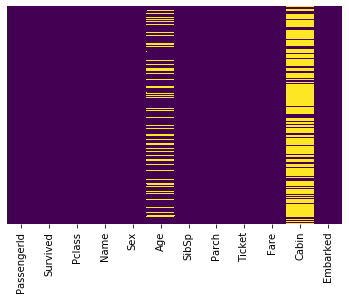

In [6]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='viridis')

Total number records in our training set : 891
Total number of Age's data missing : 177(20% data is missing) We can replace this data with some form of imputation 
Total number of Cabin'data missing : 687, which is big amount. So either we can drop this column or replace value with 0 for 'known the cabin number' or 1 for 'Cabin not know' 
we can decide it later in EDA process

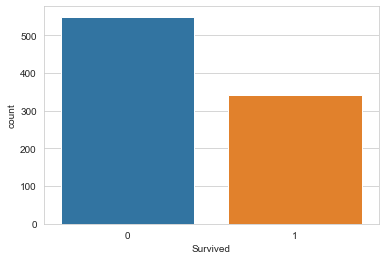

In [7]:
sns.set_style('whitegrid')
sns.countplot('Survived',data=train)

In [8]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

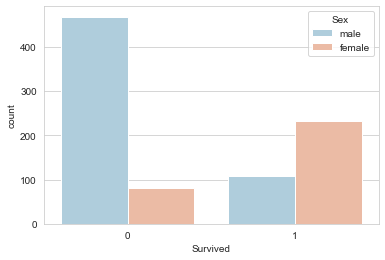

In [9]:
# People survived based on the their gender
sns.countplot('Survived', data=train, hue='Sex', palette='RdBu_r')

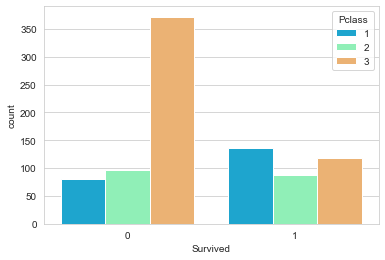

In [10]:
# People survived based on the passenger class they belong
sns.countplot('Survived', data=train, hue='Pclass', palette='rainbow')

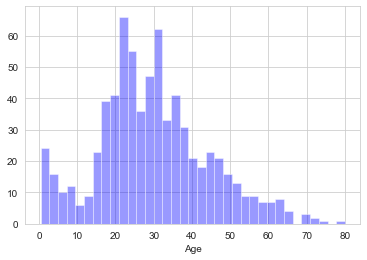

In [11]:
# Maximum number of people travelling in tatanic belong to which age range
sns.distplot(train['Age'].dropna(),kde=False,color='blue', bins=35)

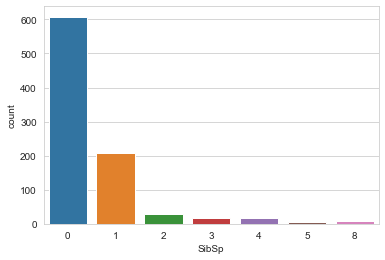

In [12]:
#Count of people travelling alone or with spouse or childer or any sibling
sns.countplot('SibSp',data=train)

In [13]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

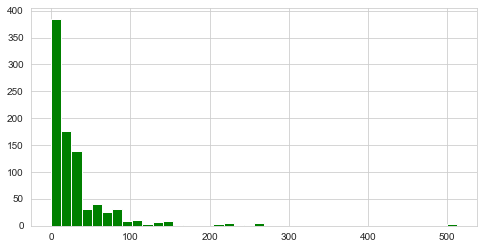

In [14]:
#The average number of Fare ticket bought 
train['Fare'].hist(color='green', bins=40, figsize=(8,4))

# Data cleaning

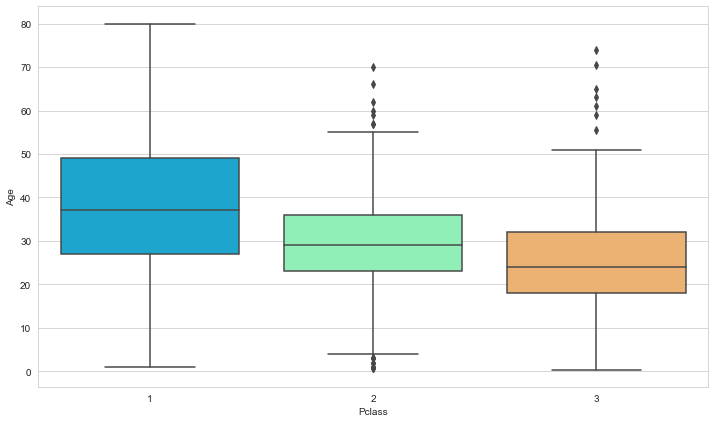

In [15]:
# removing null values by drop that column or replacing null vlaues
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=train, palette='rainbow')

In [16]:
 #In above boxplot we can notice in 1st class (rich)people are more older than compare to other 2 class.
# we will be taking average age of passenger class to replace the null value in age column with respect to their Pclass

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age
        

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

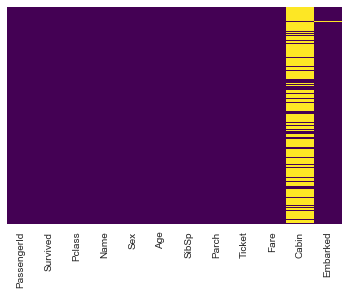

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [19]:
#Drop the Cabin column , as it does not give any significant info and most of the data are missing
train.drop('Cabin',axis=1,inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


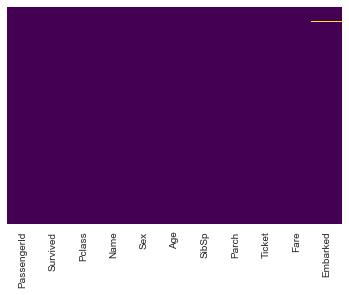

In [21]:
#All the missing value have been handled
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [22]:
#Covert the Categorical column - Sex & Embarked into integer value
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
train.drop(['Ticket','Name','Sex','Embarked'], axis = 1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [25]:
train = pd.concat([train,sex,embarked],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Applying Logistic Regression 

In [26]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [27]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),
                                                 train['Survived'], test_size = 0.30,
                                                 random_state=200)

# Traing the model and predicting 

In [29]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#Predicting that the given person survived or not
predictions = model.predict(X_test)

In [31]:
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[139,  26],
       [ 35,  68]])

In [32]:
#Checking the accuracy of model between the Predicted value and test y-value
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7723880597014925

#  Decision trees model

[Text(403.55357142857144, 498.3, 'X[6] <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]'),
 Text(245.12142857142857, 407.70000000000005, 'X[1] <= 2.5\ngini = 0.378\nsamples = 221\nvalue = [56, 165]'),
 Text(107.61428571428571, 317.1, 'X[2] <= 2.5\ngini = 0.097\nsamples = 118\nvalue = [6, 112]'),
 Text(47.82857142857143, 226.5, 'X[5] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(23.914285714285715, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(71.74285714285715, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 226.5, 'X[5] <= 26.125\ngini = 0.082\nsamples = 116\nvalue = [5, 111]'),
 Text(119.57142857142857, 135.89999999999998, 'X[2] <= 56.0\ngini = 0.184\nsamples = 39\nvalue = [4, 35]'),
 Text(95.65714285714286, 45.299999999999955, 'gini = 0.145\nsamples = 38\nvalue = [3, 35]'),
 Text(143.4857142857143, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(215.22857142857143, 135.89999999999998, 'X[

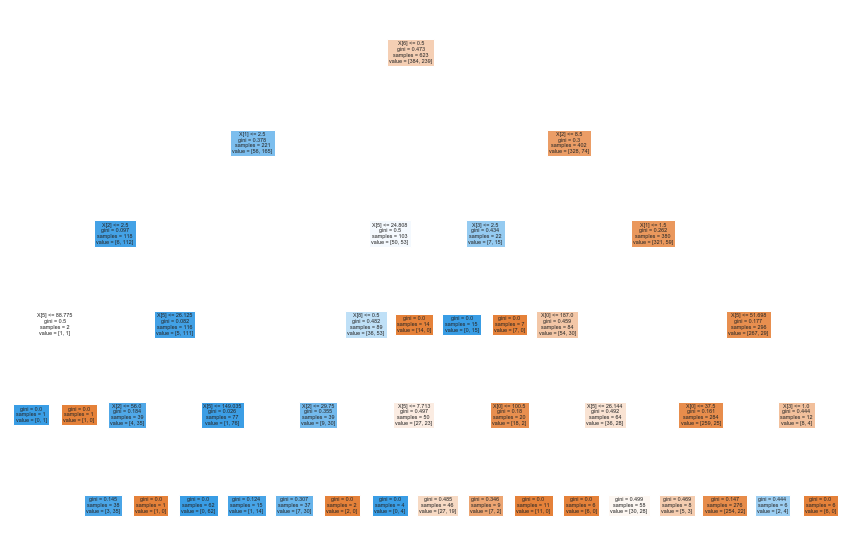

In [55]:
decision_tree = tree.DecisionTreeClassifier(random_state = 0,max_depth = 5)
decision_tree.fit(X_train,y_train)

plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)


In [56]:
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7947761194029851

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, Y)

# Gaussian Naive Bayes model

In [40]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7686567164179104

# Random Forest model

In [67]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
accuracy


0.7947761194029851